In [4]:
setwd("/projects/CARDIPS/analysis/epigenome_resource")
source("analyses/jennifer/notebooks/functions.R")

set.seed(5366)

# Figure 5b: Number of modules and singletons per trait per tissue

## read supplemental table

In [6]:
table = fread("manuscript/tables/Table_SX_All_GWAS_Signals.txt", data.table = F) %>%
    dplyr::rename(description = Trait_Description)

unique(table$description)


[1] "HDL Cholesterol"        "LDL Direct"             "Childhood Obesity"     
 [4] "Body Mass Index"        "Pulse Rate"             "Type 1 Diabetes"       
 [7] "Angina Pectoris"        "Myocardial Infarction"  "Ischemic Heart Disease"
[10] "Atrial Fibrillation"    "Fasting Glucose"        "Type 2 Diabetes"       
[13] "Parental Lifespan"      "Aging"                  "Birth Weight"          
[16] "Ventricular Rate"       "QRS Duration"

## rename traits

In [7]:
table[table$description %like% "Birth" | table$description %like% "birth",]$description = "Birth\nWeight"
table[table$description == 'Childhood Obesity',]$description = "Childhood\nObesity"
table[table$description %like% "Type 1" | table$description %like% "type_1",]$description = "Type 1\nDiabetes"
table[table$description %like% "Fasting" | table$description %like% "fasting",]$description = "Fasting\nGlucose"
table[table$description %like% "Type 2" | table$description %like% "type 2",]$description = "Type 2\nDiabetes"
table[table$description %like% "Ischemic Heart Disease",]$description = "Ischemic\nHeart\nDisease"
table[table$description %like% "LDL",]$description = "LDL\nDirect"
table[table$description %like% "Body Mass",]$description = "Body Mass\nIndex"
table[table$description == "Parental Lifespan",]$description = "Parental\nLifespan"
table[table$description %like% "HDL",]$description = "HDL\nCholesterol"
table[table$description %like% "Angina",]$description = "Angina\nPectoris"
table[table$description %like% "Atrial",]$description = "Atrial\nFibrillation"
table[table$description %like% "Myo",]$description = "Myocardial\nInfarction"
table[table$description %like% "Vent",]$description = "Ventricular\nRate"
table[table$description %like% "QRS",]$description = "QRS\nDuration"
table[table$description %like% "Pulse",]$description = "Pulse\nRate"
unique(table$description)


[1] "HDL\nCholesterol"         "LDL\nDirect"             
 [3] "Childhood\nObesity"       "Body Mass\nIndex"        
 [5] "Pulse\nRate"              "Type 1\nDiabetes"        
 [7] "Angina\nPectoris"         "Myocardial\nInfarction"  
 [9] "Ischemic\nHeart\nDisease" "Atrial\nFibrillation"    
[11] "Fasting\nGlucose"         "Type 2\nDiabetes"        
[13] "Parental\nLifespan"       "Aging"                   
[15] "Birth\nWeight"            "Ventricular\nRate"       
[17] "QRS\nDuration"

## prepare data for plotting # modules and singletons per trait

In [10]:
table1 = table %>% 
    filter(QTL_Combination_Collapse != "" & Membership != "") %>% 
    select(description, Tissue, Membership, Cluster_ID) %>% 
    group_by(description, Tissue, Membership) %>%
    distinct() %>%
    dplyr::summarise(Freq = n()) %>%
    ungroup() %>%
    group_by(description, Membership) %>%
    dplyr::mutate(total = sum(Freq)) %>%
    mutate(label = paste0("n=", total))  %>%
    ungroup() %>%
    mutate(Tiss_Module = paste(Tissue, Membership)) %>%
    mutate(Membership = ifelse(Membership == "Module", "M", "S"))

table1 %>% head(2)

`summarise()` has grouped output by 'description', 'Tissue'. You can override
using the `.groups` argument.


description,Tissue,Membership,Freq,total,label,Tiss_Module
<chr>,<chr>,<chr>,<int>,<int>,<chr>,<chr>
Aging,CVPC,M,1,4,n=4,CVPC Module
Aging,CVPC,S,4,14,n=14,CVPC Singleton


## prepare data for plotting # modules and singletons for all traits

In [11]:
table2 = table %>% 
    filter(QTL_Combination_Collapse != "" & Membership != "") %>% 
    select(Cluster_ID, Membership, Tissue) %>%
    distinct() %>%
    group_by(Tissue, Membership) %>%
    dplyr::summarise(Freq = n()) %>%
    ungroup() %>%
    group_by(Membership) %>% 
    dplyr::mutate(total = sum(Freq)) %>%
    mutate(label = paste0("n=", total)) %>%
    mutate(Tiss_Module = paste(Tissue, Membership)) %>% 
    ungroup() %>%
    mutate(description = "All 17\nTraits") %>%
    mutate(Membership = ifelse(Membership == "Module", "M", "S"))
    
table2

`summarise()` has grouped output by 'Tissue'. You can override using the
`.groups` argument.


Tissue,Membership,Freq,total,label,Tiss_Module,description
<chr>,<chr>,<int>,<int>,<chr>,<chr>,<chr>
CVPC,M,127,281,n=281,CVPC Module,All 17 Traits
CVPC,S,225,615,n=615,CVPC Singleton,All 17 Traits
PPC,M,45,281,n=281,PPC Module,All 17 Traits
PPC,S,175,615,n=615,PPC Singleton,All 17 Traits
iPSC,M,109,281,n=281,iPSC Module,All 17 Traits
iPSC,S,215,615,n=615,iPSC Singleton,All 17 Traits


## write source data

In [12]:
fwrite(rbind(table1, table2), "manuscript/figures/SourceData.Figure5b.Number_Modules_Per_Trait.txt", row.names = F, sep = "\t")

## set order of traits

In [13]:
order = c('HDL\nCholesterol', 'Fasting\nGlucose', 'LDL\nDirect', 'Myocardial\nInfarction', 
          'Ventricular\nRate', 'Atrial\nFibrillation', 'QRS\nDuration', 'Angina\nPectoris',
          'Pulse\nRate', 'Body Mass\nIndex', 'Childhood\nObesity', 'Birth\nWeight', 
          'Ischemic\nHeart\nDisease', 'Type 2\nDiabetes', 'Aging', 'Parental\nLifespan', 'Type 1\nDiabetes')
           

table1$description = factor(table1$description, levels = order)


## remove labels for entries <= 2 (too small to add label)

In [14]:
table1$indiv_label = ifelse(table1$Freq <= 2, NA, table1$Freq)

## set order to QTL membership status

In [15]:
order = rev(c("iPSC Singleton", "iPSC Module", "CVPC Singleton", "CVPC Module", "PPC Singleton", "PPC Module"))
table1$Tiss_Module = factor(table1$Tiss_Module, levels = order)
table2$Tiss_Module = factor(table2$Tiss_Module, levels = order)

## plot for each trait

Warning message:
“Removed 31 rows containing missing values (`geom_text()`).”


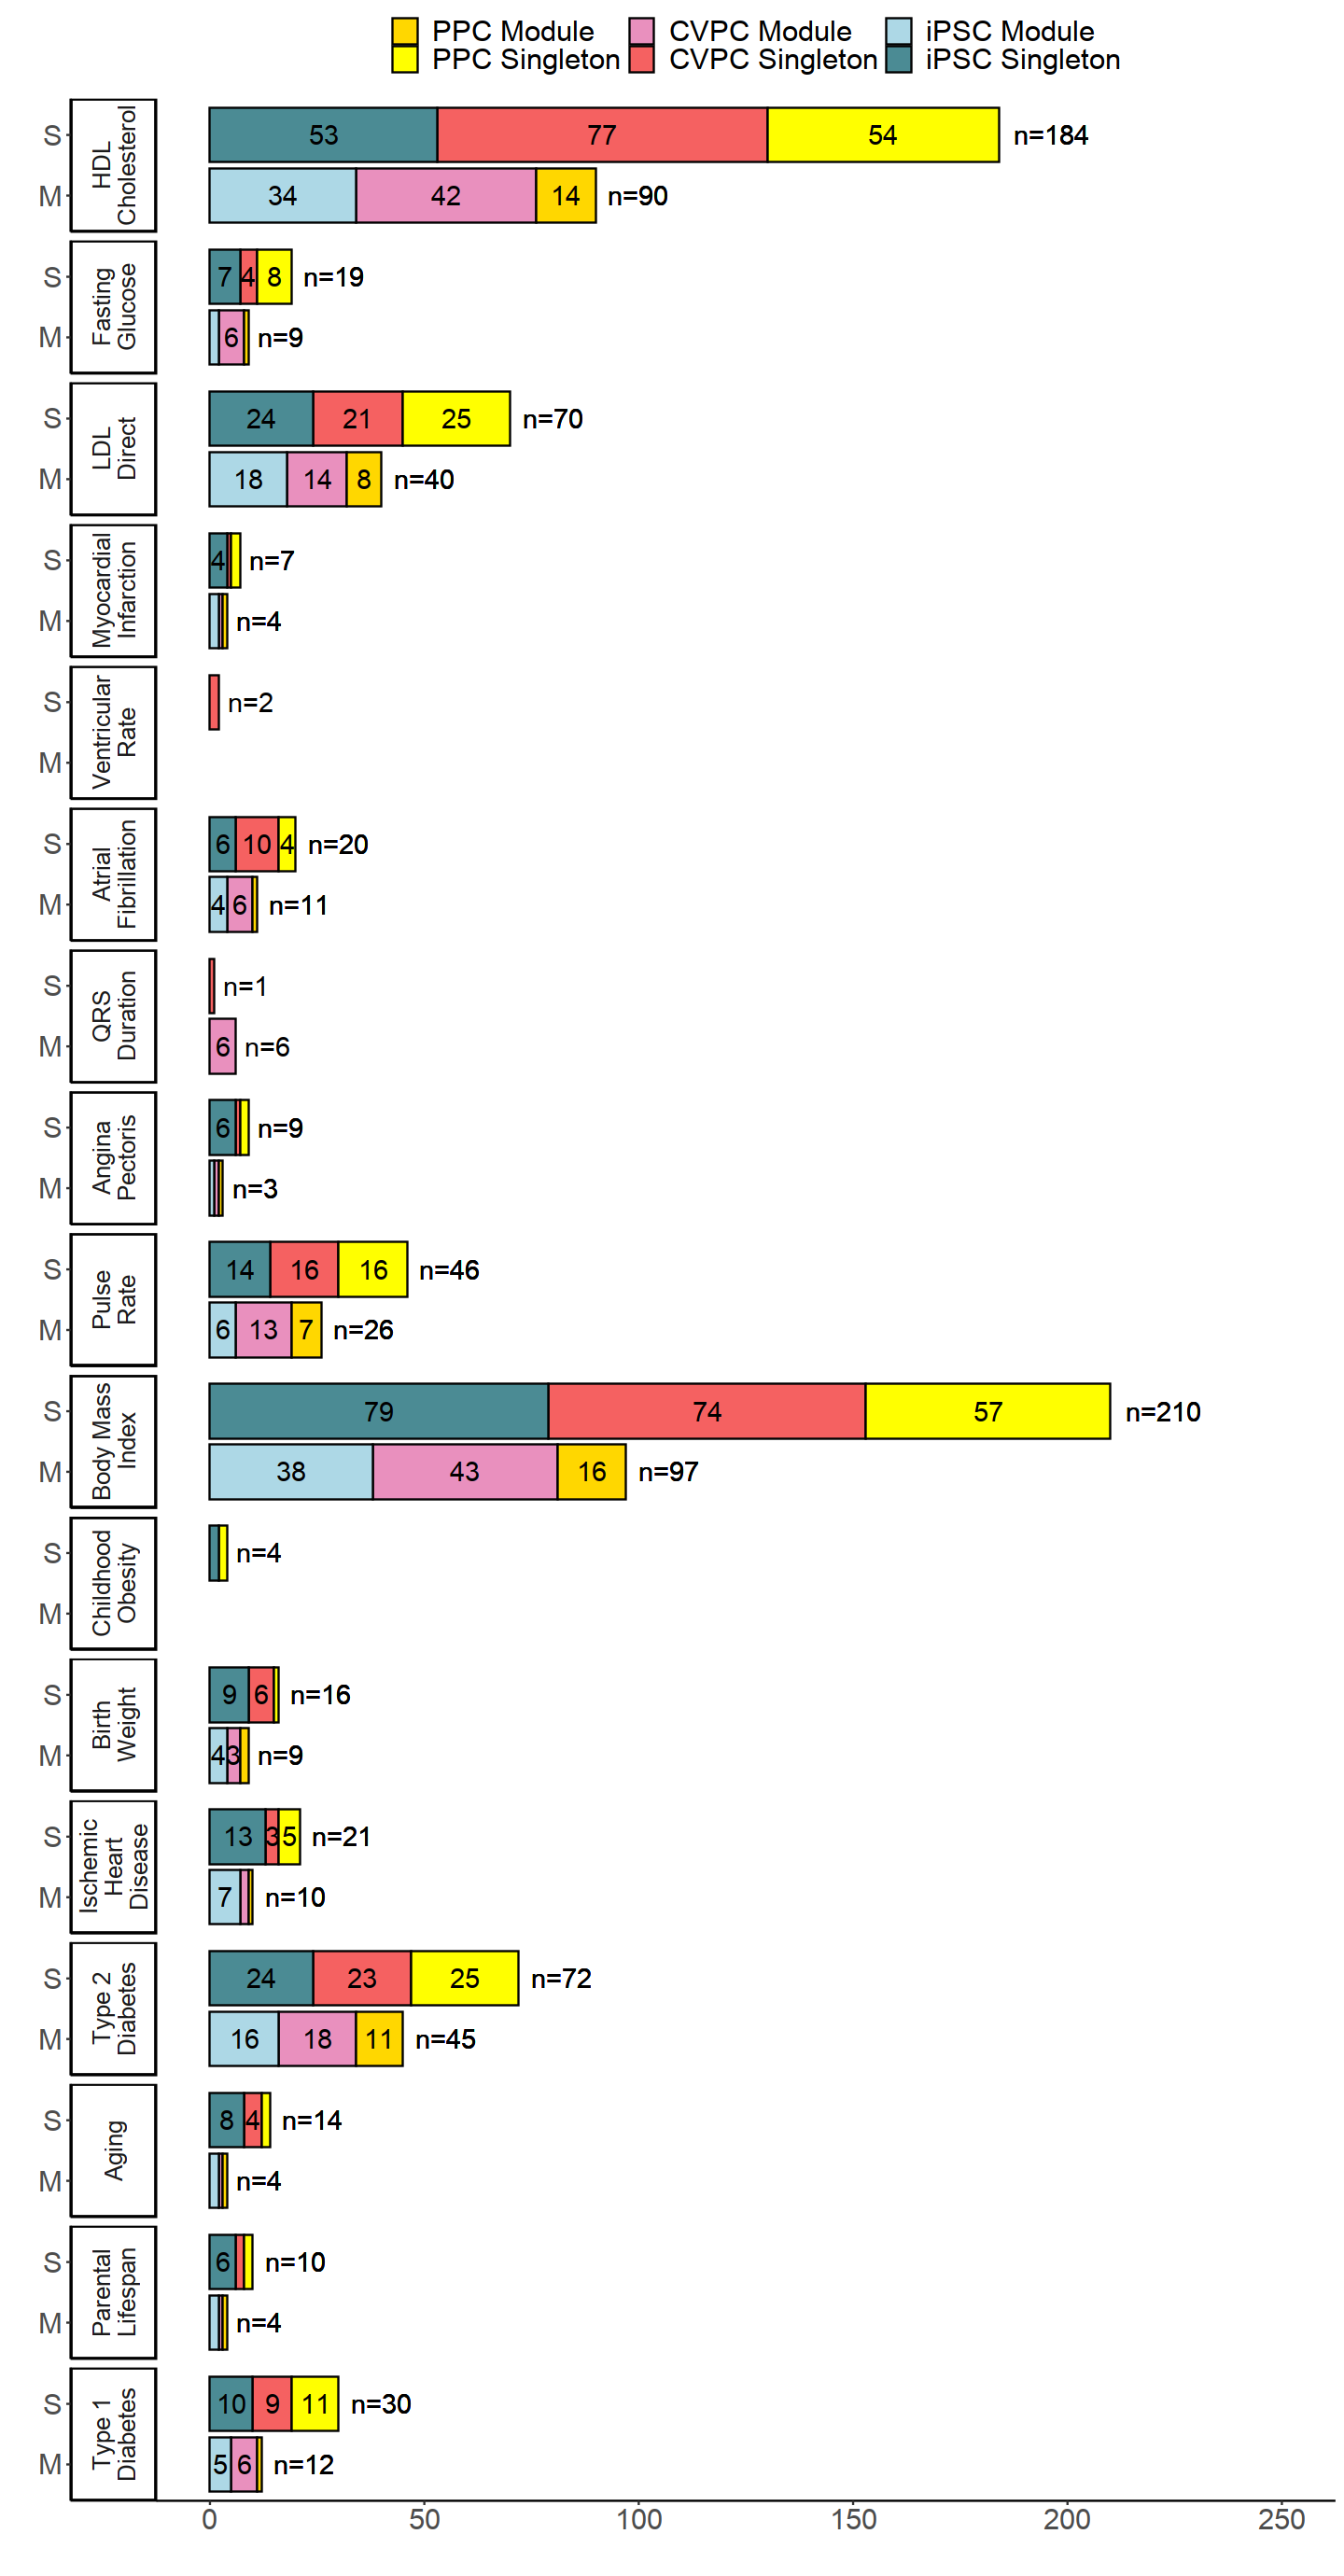

In [16]:
psize(w = 12, h = 23)
p0 = ggplot(table1, aes(x = Freq, y = Membership,  label = indiv_label, fill = Tiss_Module)) + 
    geom_bar(stat = "identity", color = "black") + jn_classic + 
    geom_text(data = table1, size = 6, position = position_stack(vjust = 0.5)) + 
    facet_wrap(.~description, ncol = 1, strip.position="left") + 
    theme(
        legend.position = "top",
        legend.text = element_text(size = 18),
        legend.title = element_text(size = 18),
        strip.text = element_text(size = 15)
    ) + xlab("") + 
    ylab("") + 
    scale_fill_manual(values = rev(c("#4b8b94", 
                                 "lightblue",
                                 "#f56161", 
                                 "#e990be", 
                                 "yellow", 
                                 "gold")), 
                      name = "") + 
    geom_text(data = table1, aes(x = total, y = Membership, label = label), hjust = -0.2, size = 6) +
    xlim(0, 250)

p0

## plot for all traits

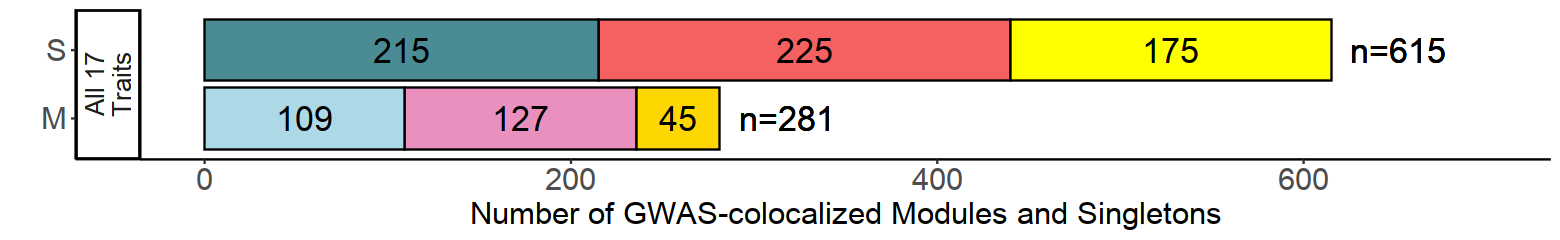

In [17]:
p2 = ggplot(table2, aes(x = Freq, y = Membership,  label = Freq, fill = Tiss_Module)) + 
    geom_bar(stat = "identity", color = "black") + jn_classic + 
    geom_text(size = 7, position = position_stack(vjust = 0.5)) + 
    facet_wrap(.~description, ncol = 1, strip.position="left") + 
    theme(
        legend.position = "none",
        legend.text = element_text(size = 18),
        legend.title = element_text(size = 18),
        strip.text = element_text(size = 15)
    ) + xlab("Number of GWAS-colocalized Modules and Singletons") + ylab("") + 
    scale_fill_manual(values = rev(c("#4b8b94","lightblue",  "#f56161", "#e990be", "yellow", "gold")), name = "") + 
    geom_text(data = table2, aes(x = total, y = Membership, label = label), hjust = -0.2, size = 7)   + 
    xlim(0, 700)

psize(w = 13, h = 2)
p2

## combine plots

Warning message:
“Removed 31 rows containing missing values (`geom_text()`).”
Warning message:
“Graphs cannot be horizontally aligned unless the axis parameter is set. Placing graphs unaligned.”


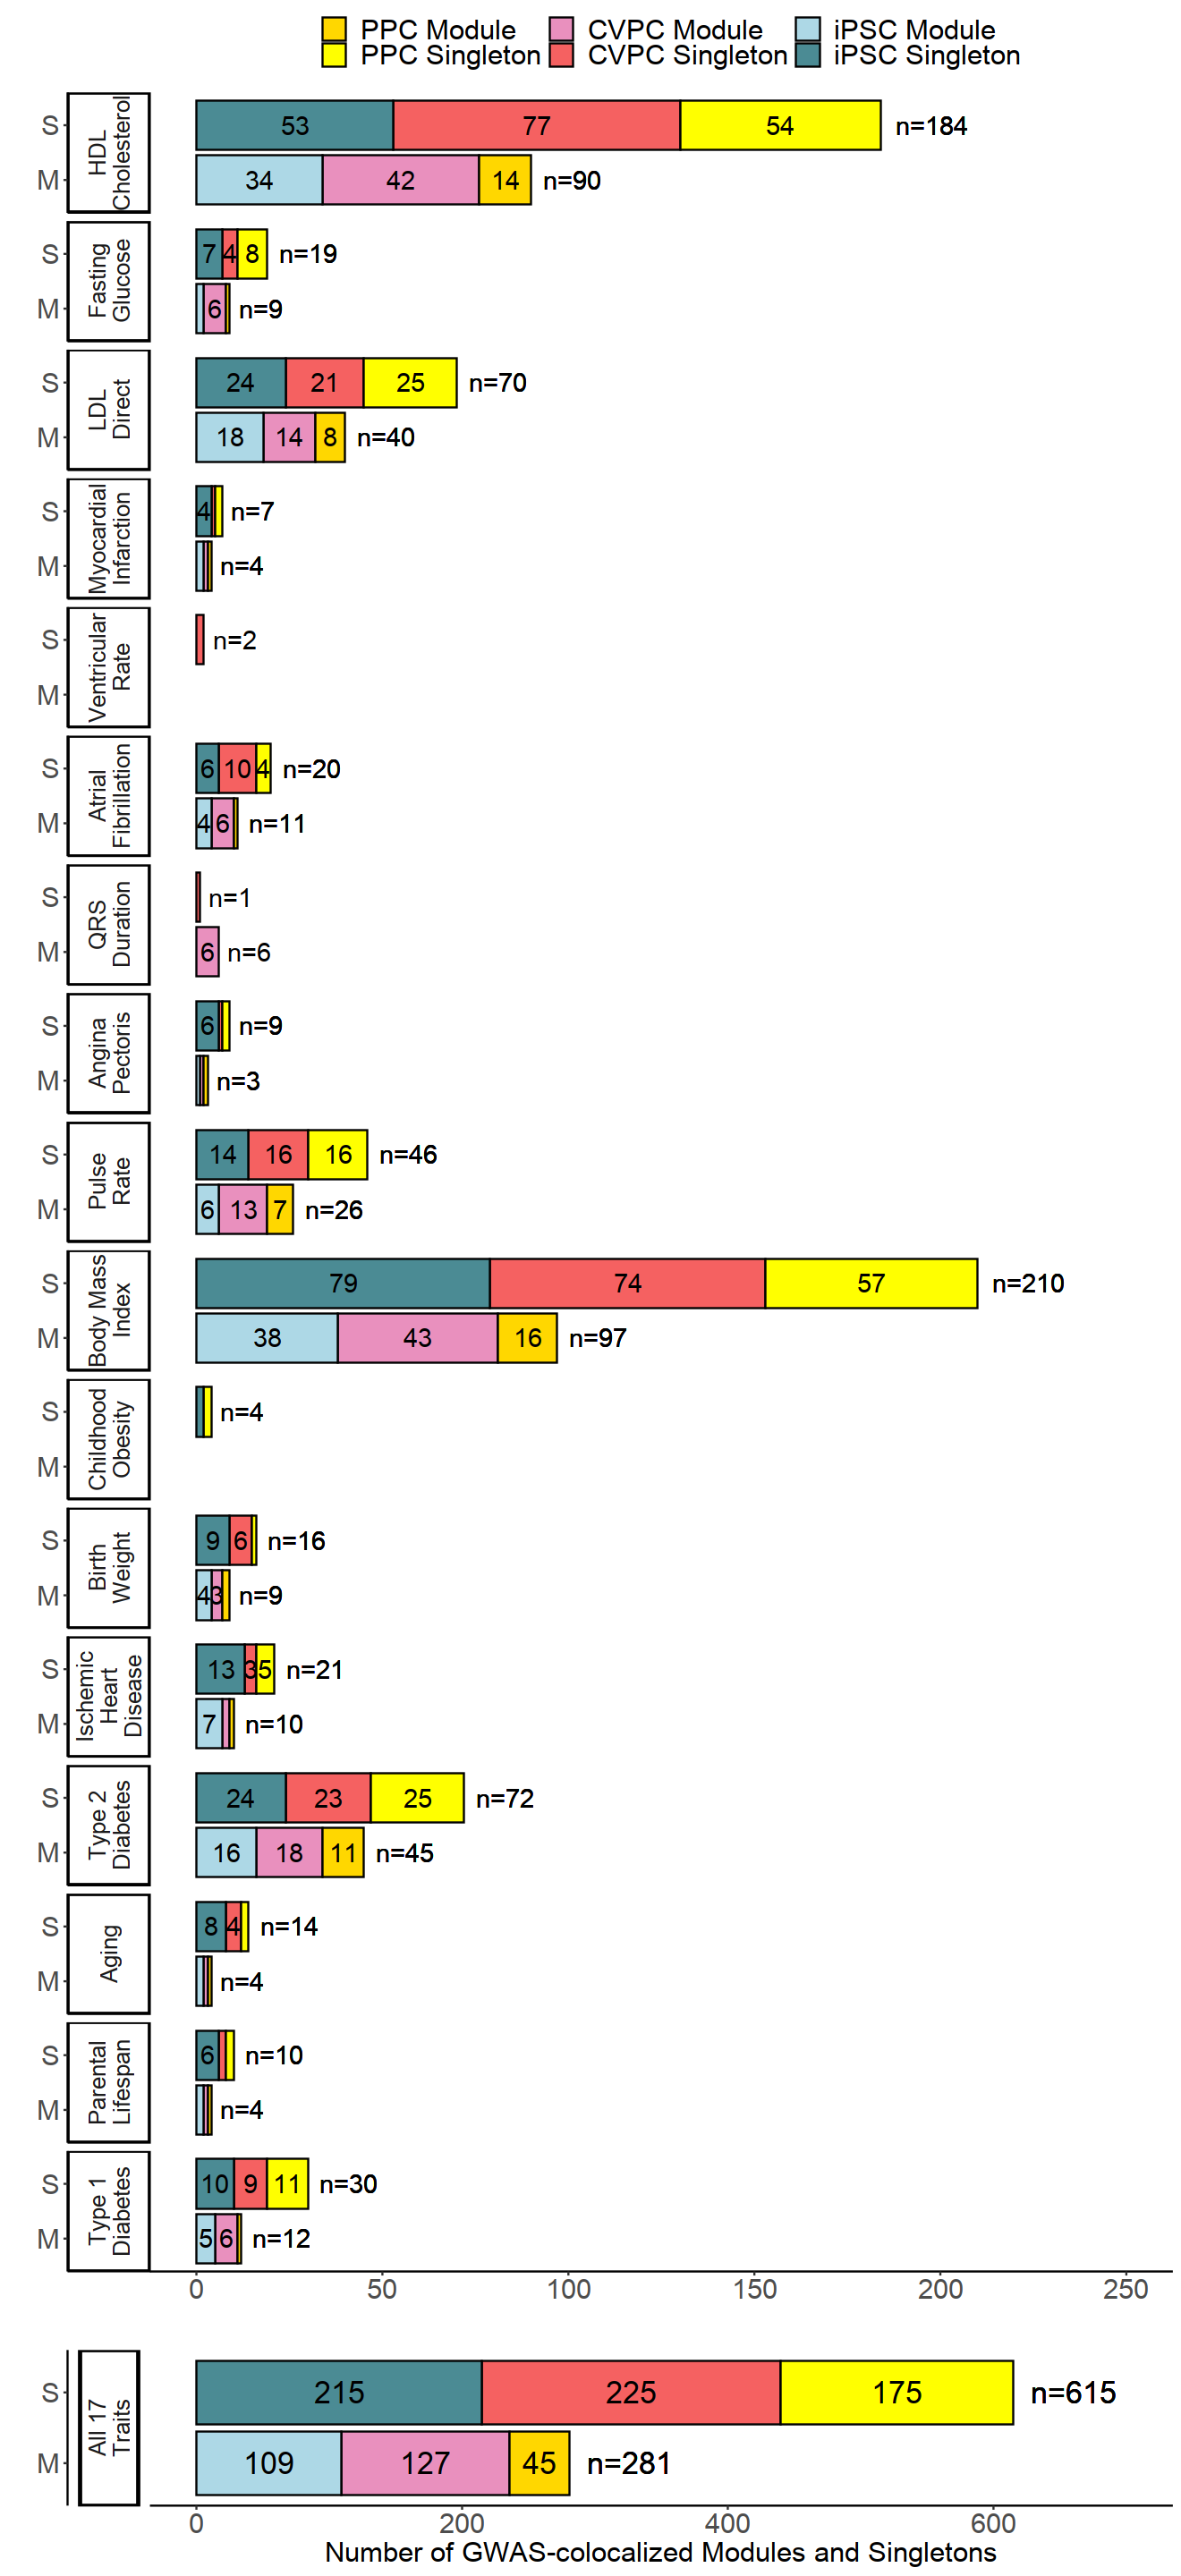

In [18]:
psize(w = 11, h = 24)
p3 = plot_grid(p0, p2, ncol = 1, align = "hv", rel_heights = c(1, 0.1))
p3

## reorder legend to the same order presented in plot

### reverse order to QTL membership status

In [20]:
order = c("iPSC Singleton", "iPSC Module", "CVPC Singleton", "CVPC Module", "PPC Singleton", "PPC Module")
table1$Tiss_Module = factor(table1$Tiss_Module, levels = order)

### replot using reversed order of colors

Warning message:
“Removed 31 rows containing missing values (`geom_text()`).”


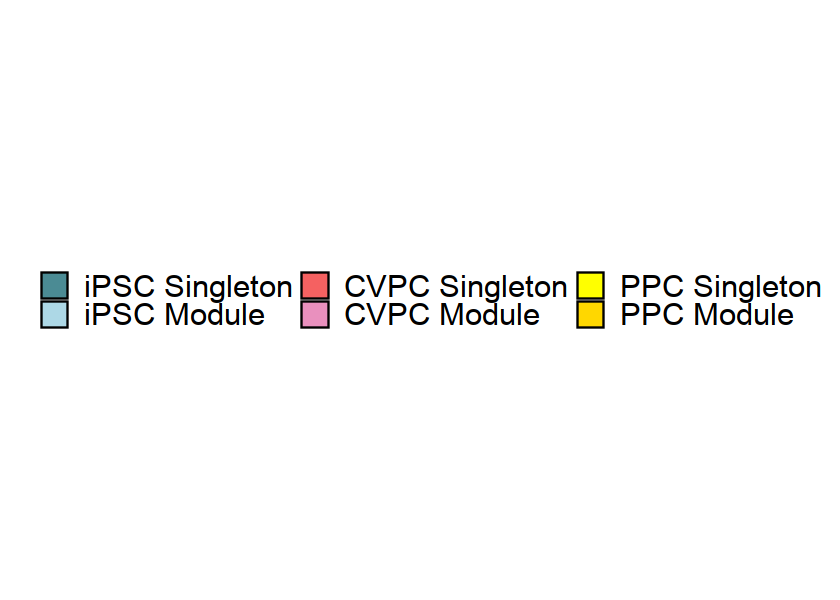

In [21]:
psize(w = 7, h = 5)
p = ggplot(table1, aes(x = Freq, y = Membership,  label = indiv_label, fill = Tiss_Module)) + 
    geom_bar(stat = "identity", color = "black") + jn_classic + 
    geom_text(data = table1, size = 6, position = position_stack(vjust = 0.5)) + 
    facet_wrap(.~description, ncol = 1, strip.position="left") + 
    theme(
        legend.position = "top",
        legend.text = element_text(size = 18),
        legend.title = element_text(size = 18),
        strip.text = element_text(size = 15)
    ) + xlab("") + 
    ylab("") + 
    scale_fill_manual(values = c("#4b8b94", 
                                 "lightblue",
                                 "#f56161", 
                                 "#e990be", 
                                 "yellow", 
                                 "gold"), 
                      name = "") + 
    geom_text(data = table1, aes(x = total, y = Membership, label = label), hjust = -0.2, size = 6) +
    xlim(0, 250)

grid::grid.draw(get_legend(p))